In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

types = ["chicken_wings","donuts","french_fries","hamburger","pizza","ramen","samosa","sushi","waffles"]
len(types)

# Enter the path to your food images dataset 
path = "C:/Users/admin/Jupyter Notebooks/FOOD PEEK/Food Dataset/images"

In [7]:
training_data=[]

def create_training_data():
    for t in types:
        img_path = os.path.join(path,t) # Each image folder
        class_num = types.index(t)
        for image in os.listdir(img_path): # Each image
            img_array = cv2.imread(os.path.join(img_path,image),1)
            new_imgarray = cv2.resize(img_array,(224,224))
            training_data.append([new_imgarray,class_num])

create_training_data()

In [3]:
new = np.array(training_data)

new.shape

data = pd.DataFrame(training_data)

food = []
labels = []
food_data = []

for i in range(len(new)):
    food_data.append((new[i][0],new[i][1]))

from random import shuffle

shuffle(food_data)

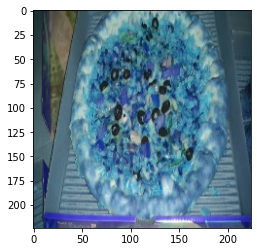

In [4]:
plt.imshow(food_data[0][0])

In [5]:
for i in range(len(food_data)):
    food.append(food_data[i][0])
    labels.append(food_data[i][1])

food = np.array(food)
food = food/255.0

labels = np.array(labels)

In [6]:
food_data = np.array(food_data)
food_data.shape

(900, 2)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(300, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(300, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(9,activation=tf.nn.softmax))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy")

model.fit(food,labels,epochs=50)

Epoch 1/50
29/29 [==============================] - 7s 242ms/step - loss: 54.9164
Epoch 2/50
29/29 [==============================] - 7s 235ms/step - loss: 8.8813
Epoch 3/50
29/29 [==============================] - 7s 235ms/step - loss: 3.0485
Epoch 4/50
29/29 [==============================] - 7s 231ms/step - loss: 2.3522
Epoch 5/50
29/29 [==============================] - 7s 234ms/step - loss: 2.1726
Epoch 6/50
29/29 [==============================] - 7s 235ms/step - loss: 1.9279
Epoch 7/50
29/29 [==============================] - 7s 230ms/step - loss: 1.9461
Epoch 8/50
29/29 [==============================] - 7s 234ms/step - loss: 1.9200
Epoch 9/50
29/29 [==============================] - 7s 229ms/step - loss: 1.6696
Epoch 10/50
29/29 [==============================] - 7s 237ms/step - loss: 1.6749
Epoch 11/50
29/29 [==============================] - 7s 232ms/step - loss: 1.6434
Epoch 12/50
29/29 [==============================] - 7s 231ms/step - loss: 1.8105
Epoch 13/50
29/29 [=====

In [64]:
model.save("C:/Users/admin/Jupyter Notebooks/FOOD PEEK")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/admin/Jupyter Notebooks/FOOD PEEK\assets


In [4]:
from tensorflow.keras.models import load_model
import os

new_model = load_model("C:/Users/admin/Jupyter Notebooks/FOOD PEEK")

In [5]:
# Enter the path to a test image
test = cv2.imread("C:/Users/admin/Jupyter Notebooks/FOOD PEEK/Test Images/test4.jpg",1)

#len(test)
#plt.imshow(test)

new_test = cv2.resize(test,(224,224))

#plt.imshow(new_test)
#food.shape

test = cv2.resize(test,(224,224))
test = np.array(test)
test = test/255.0
test = [test]
test = np.array(test)

pre = new_model.predict(test)
    
result =np.argmax(pre)
types = ["chicken_wings","donuts","french_fries","hamburger","pizza","ramen","samosa","sushi","waffles"]
print(types[result])

hamburger


In [2]:
# Creating a GUI window for Registration
from tkinter import *
from PIL import ImageTk, Image
from tkinter import ttk, messagebox
import os
import re
import mysql.connector
from datetime import datetime
import smtplib
from email.message import EmailMessage

class Register:
    def __init__(self,root):
        self.root = root
        self.root.title("Registration Window")
        self.root.geometry("1350x700")
        self.register_btn_value = IntVar()
        
        # Setting Background Image
        self.bg = ImageTk.PhotoImage(file="C:/Users/admin/Downloads/GOURI/Mini Project/5th SEM (Food Peek)/wood1.jpg",master=self.root)
        bg = Label(self.root,image=self.bg).place(x=0,y=0,relwidth=1,relheight=1)

        # Setting Left Image
        self.left = ImageTk.PhotoImage(file="C:/Users/admin/Downloads/GOURI/Mini Project/5th SEM (Food Peek)/pizza1.jpg",master=self.root)
        left = Label(self.root,image=self.left).place(x=80,y=100,width=375,height=500)

        # Setting Right Frame
        frame1 = Frame(self.root, bg="white")
        frame1.place(x=455,y=100,width=700,height=500)
        
        # Setting The Title of Frame
        title = Label(frame1, text="REGISTER FOR FOOD PEEK", font=("Georgia",20,"bold","underline"),bg="white",fg="black").place(x=150,y=30)
        

        name_label = Label(frame1,text="Full Name",font=("Georgia",14),bg="white",fg="black").place(x=60,y=100)
        self.name_entry = Entry(frame1,font=("Georgia",14),bg="lightgray")
        self.name_entry.place(x=60,y=130,width=250)
        
        phone_label = Label(frame1,text="Phone Number",font=("Georgia",14),bg="white",fg="black").place(x=380,y=100)
        self.phone_entry = Entry(frame1,font=("Georgia",14),bg="lightgray")
        self.phone_entry.place(x=380,y=130,width=250)
        
        email_label = Label(frame1,text="Email Address",font=("Georgia",14),bg="white",fg="black").place(x=60,y=180)
        self.email_entry = Entry(frame1,font=("Georgia",14),bg="lightgray")
        self.email_entry.place(x=60,y=210,width=250)
        
        username_label = Label(frame1,text="Choose Username",font=("Georgia",14),bg="white",fg="black").place(x=380,y=180)
        self.username_entry = Entry(frame1,font=("Georgia",14),bg="lightgray")
        self.username_entry.place(x=380,y=210,width=250)
        
        password_label = Label(frame1,text="Choose Password",font=("Georgia",14),bg="white",fg="black").place(x=60,y=260)
        self.password_entry = Entry(frame1,font=("Georgia",14),bg="lightgray",show="*")
        self.password_entry.place(x=60,y=290,width=250)
        
        confirmpassword_label = Label(frame1,text="Confirm Password",font=("Georgia",14),bg="white",fg="black").place(x=380,y=260)
        self.confirmpassword_entry = Entry(frame1,font=("Georgia",14),bg="lightgray",show="*")
        self.confirmpassword_entry.place(x=380,y=290,width=250)
        
        securityquestion_label = Label(frame1,text="Choose Security Question",font=("Georgia",14),bg="white",fg="black").place(x=60,y=340)
        self.securityquestion_entry_combo = ttk.Combobox(frame1,font=("Georgia",16),justify="center",state="readonly")
        self.securityquestion_entry_combo['values'] = ("Select","Name of your first pet","Name of your favourite teacher","Your favourite movie","Your best friend")
        self.securityquestion_entry_combo.place(x=60,y=370,width=250)
        self.securityquestion_entry_combo.current(0)
        
        answer_label = Label(frame1,text="Answer Security Question",font=("Georgia",14),bg="white",fg="black").place(x=380,y=340)
        self.answer_entry = Entry(frame1,font=("Georgia",14),bg="lightgray")
        self.answer_entry.place(x=380,y=370,width=250)
        
        terms_check = Checkbutton(frame1,text="I AGREE TO THE TERMS AND CONDITIONS",font=("Georgia",12),bg="white",variable=self.register_btn_value).place(x=60,y=430)
        
        self.btn_image = ImageTk.PhotoImage(file="C:/Users/admin/Downloads/GOURI/Mini Project/5th SEM (Food Peek)/register.png",master=self.root)
        register_btn = Button(frame1,image=self.btn_image,bg="white",bd=0,command=self.add_to_database).place(x=430,y=410)
    
    def move_to_login(self):
        self.root.destroy()
        log = Tk()
        login = Login(log)
        #log.mainloop()
    
    def add_to_database(self):
        #Validating all fields using regular expressions
        namevali = '^[A-Za-z]+[\s]?[A-Za-z]*$'
        phonevali = '^[1-9]{1}[0-9]{9}$'
        emailvali = '^[a-zA-Z0-9]+[\._]?[a-zA-Z0-9]+[@]\w+[.]\w{2,3}$'
        
        if self.name_entry.get()=="" or self.phone_entry.get()=="" or self.email_entry.get()=="" or self.username_entry.get()=="" or self.password_entry.get()=="" or self.confirmpassword_entry.get()=="" or self.securityquestion_entry_combo.get()=="Select" or self.answer_entry.get()=="":
            messagebox.showerror(title="Invalid Registration", message="All fields are required.\nPlease fill all the fields correctly.", parent=self.root)
        elif not re.search(namevali,self.name_entry.get()):
            messagebox.showerror(title="Invalid Registration", message="Please enter a valid name.", parent=self.root)
        elif not re.search(phonevali,self.phone_entry.get()):
            messagebox.showerror(title="Invalid Registration", message="Please enter a valid phone number.", parent=self.root)
        elif not re.search(emailvali,self.email_entry.get()):
            messagebox.showerror(title="Invalid Registration", message="Please enter a valid email ID.", parent=self.root)
        elif not self.password_entry.get() == self.confirmpassword_entry.get():
            messagebox.showerror(title="Invalid Registration", message="Password and confirm password do not match. Please check and retype again.", parent=self.root)
        elif self.register_btn_value.get() == 0:
            messagebox.showerror(title="Invalid Registration", message="Please accept the terms and conditions before proceeding.", parent=self.root)
        else:
            mydb = mysql.connector.connect(
                    host="localhost",
                    user="username",
                    password="password",
                    database="food_peek")
            mycursor = mydb.cursor()
            mycursor.execute("select * from user_table where email_id=%s",(self.email_entry.get(),))
            check_email = mycursor.fetchone()
            if check_email != None:
                messagebox.showerror(title="Invalid Registration", message="Account with same email already exists.", parent=self.root)
            else:
                messagebox.showinfo(title="Registration Successful", message="Congratulations!\nYou have successfully registered for FOOD PEEK!", parent=self.root)
                doj = datetime.today().strftime('%Y-%m-%d')

                #Save to Database  
                mydb = mysql.connector.connect(
                    host="localhost",
                    user="username",
                    password="password",
                    database="food_peek")

                mycursor = mydb.cursor()
                mycursor.execute("INSERT INTO user_table(email_id, name, username, password, phone_no, doj, security_que, security_ans) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)",(self.email_entry.get(),self.name_entry.get(),self.username_entry.get(),self.password_entry.get(),self.phone_entry.get(),doj,self.securityquestion_entry_combo.get(),self.answer_entry.get()))
                mydb.commit()
                print(mycursor.rowcount, "Record Inserted.")

                #Send email for confirmation of registartion
                email = EmailMessage()
                email['from'] = 'Food Peek'
                email['to'] = self.email_entry.get()                
                email['subject'] = 'Food Peek Registration Successful'
                email.set_content('Hey there!\nWelcome onboard to Food Peek, a one-stop location to all things tasty!\nHere you can find the name of that delicious looking dish, the ingredients required, the recipe and much more!\nHAPPY FOOD!')


                with smtplib.SMTP(host='smtp.gmail.com', port=587) as smtp:
                    smtp.ehlo()
                    smtp.starttls()
                    smtp.login('Your Email ID', 'Your Password')
                    smtp.send_message(email)
                print('Email has been sent successfully!')
                self.move_to_login()
                
    
        

In [10]:
# Creating a GUI window for Login
from tkinter import *
from PIL import ImageTk, Image
from tkinter import ttk, messagebox
import os
import re
import mysql.connector

class Login:
    def __init__(self,root):
        self.root = root
        self.root.title("Login Window")
        self.root.geometry("1350x700")
        
        # Setting Background Image
        self.bg = ImageTk.PhotoImage(file="C:/Users/admin/Downloads/GOURI/Mini Project/5th SEM (Food Peek)/wood1.jpg",master=self.root)
        bg = Label(self.root,image=self.bg).place(x=0,y=0,relwidth=1,relheight=1)

        # Setting Left Image
        self.left = ImageTk.PhotoImage(file="C:/Users/admin/Downloads/GOURI/Mini Project/5th SEM (Food Peek)/pizza1.jpg",master=self.root)
        left = Label(self.root,image=self.left).place(x=80,y=100,width=375,height=500)

        # Setting Right Frame
        frame1 = Frame(self.root, bg="white")
        frame1.place(x=455,y=100,width=700,height=500)
        
        # Setting The Title of Frame
        title = Label(frame1, text="WELCOME TO FOOD PEEK", font=("Georgia",20,"bold","underline"),bg="white",fg="black").place(x=150,y=30)
        
        # Setting The Sub-title of Frame
        subtitle = Label(frame1, text="LOGIN", font=("Georgia",18,"bold","underline"),bg="white",fg="green").place(x=300,y=90)
        
        login_username_label = Label(frame1,text="Enter Email :",font=("Georgia",14),bg="white",fg="black").place(x=130,y=160)
        self.login_email_entry = Entry(frame1,font=("Georgia",14),bg="lightgray")
        self.login_email_entry.place(x=300,y=160,width=250)
        
        login_password_label = Label(frame1,text="Enter Password :",font=("Georgia",14),bg="white",fg="black").place(x=130,y=220)
        self.login_password_entry = Entry(frame1,font=("Georgia",14),bg="lightgray",show="*")
        self.login_password_entry.place(x=300,y=220,width=250)
        
        self.lbtn_image = ImageTk.PhotoImage(file="C:/Users/admin/Downloads/GOURI/Mini Project/5th SEM (Food Peek)/login.png",master=self.root)
        login_btn = Button(frame1,image=self.lbtn_image,bg="white",bd=0,command=self.validation_and_call).place(x=360,y=260)
        
        line_label = Label(frame1,text="-------------------------------------------------------------------------------------------------------",font=("Georgia",14),bg="white",fg="black").place(x=0,y=340)
        
        endtitle = Label(frame1, text="Are you new to Food Peek?", font=("Georgia",14,"bold"),bg="white",fg="black").place(x=90,y=410)
        
        self.lrbtn_image = ImageTk.PhotoImage(file="C:/Users/admin/Downloads/GOURI/Mini Project/5th SEM (Food Peek)/register.png",master=self.root)
        loginregister_btn = Button(frame1,image=self.lrbtn_image,bg="white",bd=0,command=self.move_to_registration).place(x=370,y=390)

    
    def validation_and_call(self):
        emailvali = '^[a-zA-Z0-9]+[\._]?[a-zA-Z0-9]+[@]\w+[.]\w{2,3}$'
        
        if self.login_email_entry.get()=="" or self.login_password_entry.get()=="":
            messagebox.showerror(title="Invalid Login", message="All fields are required.\nPlease fill all the fields correctly.", parent=self.root)
        elif not re.search(emailvali,self.login_email_entry.get()):
            messagebox.showerror(title="Invalid Login", message="Please enter a valid email ID.", parent=self.root)
        else:
            mydb = mysql.connector.connect(
                host="localhost",
                user="username",
                password="password",
                database="food_peek")
            mycursor = mydb.cursor()
            
            ent_email = self.login_email_entry.get()
            ent_pass = self.login_password_entry.get()
            mycursor.execute("select email_id,password from user_table where email_id= %s",(self.login_email_entry.get(),))
            output = mycursor.fetchone()
            
            if output != None:
                db_email,db_pass = output
                if db_email and db_pass and db_pass == ent_pass and db_email == ent_email:
                    print("Logged In")
                    # Move to main window
                    mycursor.execute("select name from user_table where email_id=%s",(self.login_email_entry.get(),))
                    n=mycursor.fetchone()
                    n=str(n)
                    l=len(n)
                    n=n[2:l-3]
                    self.root.destroy()
                    mainw = Tk()
                    main = Main(mainw,n,ent_email)
                else:
                    messagebox.showerror(title="Invalid Login", message="Invalid Password.\nPlease try again.", parent=self.root)
                    
            else:
                messagebox.showerror(title="Invalid Login", message="Invalid Email Id or Password.\nPlease try again.", parent=self.root)
            
    def move_to_registration(self):
        self.root.destroy()
        #reg = Toplevel()
        reg = Tk()
        registration = Register(reg)
        #reg.mainloop()
            

log = Tk()
login = Login(log)
log.mainloop()

Logged In
C:/Users/admin/Downloads/Test Images/test3.jpg
FRENCH_FRIES
('FRENCH_FRIES',)
0
temp= 13
0
temp= 13
C:/Users/admin/Downloads/Test Images/test5.jpg
PIZZA
('PIZZA',)
0
temp= 13
0
temp= 9
1
temp= 13


In [3]:
# GUI for main window
from tkinter import *
from PIL import ImageTk, Image
from tkinter import ttk, messagebox
import os
from tkinter.filedialog import askopenfilename
import smtplib
from email.message import EmailMessage

from tkinter import *
from googlesearch import search 

class Main:
    def __init__(self,root,uname,uemail):
        self.root = root
        self.root.title("Main Window")
        self.root.geometry("1350x700")
        self.uname = uname
        self.uemail = uemail
        self.my_list=[]
        
        # Setting Background Image
        self.bg = ImageTk.PhotoImage(file="C:/Users/admin/Downloads/GOURI/Mini Project/5th SEM (Food Peek)/wood1.jpg",master=self.root)
        bg = Label(self.root,image=self.bg).place(x=0,y=0,relwidth=1,relheight=1)

        # Setting Left Image
        self.left = ImageTk.PhotoImage(file="C:/Users/admin/Downloads/GOURI/Mini Project/5th SEM (Food Peek)/pizza1.jpg",master=self.root)
        left = Label(self.root,image=self.left).place(x=80,y=100,width=375,height=500)

        # Setting Right Frame
        frame1 = Frame(self.root, bg="white")
        frame1.place(x=455,y=100,width=700,height=500)
        
        # Setting The Title of Frame
        title = Label(frame1, text="YOU ARE CURRENTLY LOGGED IN AS "+self.uname.upper(), font=("Georgia",16,"bold"),bg="white",fg="black").place(x=20,y=30)
        
        # Setting The Sub-title of Frame
        subtitle = Label(frame1, text="What would you like to do today?", font=("Georgia",18,"bold","underline"),bg="white",fg="green").place(x=130,y=90)
        
        one = Label(frame1, text="1. Detect New Dish",font=("Georgia",18,"bold"),bg="white",fg="orange").place(x=100,y=150)
        two = Label(frame1, text="2. Display All Saved Items",font=("Georgia",18,"bold"),bg="white",fg="orange").place(x=100,y=260)
        three = Label(frame1, text="3. Display All Searched Items",font=("Georgia",18,"bold"),bg="white",fg="orange").place(x=100,y=320)
        
        
        self.one_btn = Button(frame1,text="CHOOSE FILE",bg="light green",bd=10,command=self.open_file).place(x=460,y=190)
        self.two_btn = Button(frame1,text="SHOW SAVED!",bg="light green",bd=10,command=self.show_saved).place(x=500,y=260)
        self.three_btn = Button(frame1,text="SHOW SEARCHED!",bg="light green",bd=10,command=self.show_searched).place(x=500,y=320)
        self.five_btn = Button(frame1,text="DETECT NOW!",bg="orange",bd=10,command=self.result_window).place(x=570,y=190)
        
        
        self.delete_btn = Button(frame1,text="DELETE PROFILE",bg="brown",fg="white",bd=10,command=self.delete_profile).place(x=50,y=440)
        self.logout_btn = Button(frame1,text="LOGOUT",bg="yellow",bd=10,command=self.move_to_login).place(x=580,y=440)
        
        
        self.strv = StringVar()
        self.strv.set("Your File Here")
        self.filename_entry_label = Entry(frame1,textvariable=self.strv,font=("Georgia",14),bg="lightgray",state="disabled",width=28).place(x=110,y=200)
        
        
        
    def open_file(self): 
        self.file = askopenfilename(filetypes =[('Image Files', '*.jpg')])
        if self.file is not None: 
            self.strv.set(self.file)
            print(self.file)

    def move_to_login(self):
        self.root.destroy()
        log = Tk()
        login = Login(log)
        #log.mainloop()
        
    def show_saved(self):
        root1 = Toplevel()
        root1.geometry("900x600")
        root1.title("Show Saved Items")

        mydb = mysql.connector.connect(
                        host="localhost",
                        user="username",
                        password="password",
                        database="food_peek")
        mycursor = mydb.cursor()

        text = Text(root1,bg="light green",font=("Georgia",16),wrap='word',yscrollcommand=set(),pady=10,padx=10,height=25,width=70)

        text.insert(INSERT, "                                                                 YOUR SAVED ITEMS\n\n")
        text.tag_add("start", "1.64", "1.99")
        text.tag_config("start", background="brown", foreground="white")

        mycursor.execute("SELECT item_id FROM saves where email_id=%s",(self.uemail,))
        ids = mycursor.fetchall()

        for i in range(len(ids)):
            print(i)
            print("temp=",(ids[i][0]))
            mycursor.execute("select food_name from item_table where item_id=%s",(ids[i][0],))
            sname = mycursor.fetchone()
            sname = str(sname[0])

            text.insert(INSERT, "Name of the dish: "+sname+"\n\n")

            mycursor.execute("select recipe_site from item_recipe_sites where item_id=%s",(ids[i][0],))
            sr = mycursor.fetchall()
            text.insert(INSERT, "Recipe of the dish: \n\n")
            for j in sr: 
                text.insert(INSERT,str(j[0])+"\n")

            mycursor.execute("select order_site from item_order_sites where item_id=%s",(ids[i][0],))
            so = mycursor.fetchall()
            text.insert(INSERT, "\n\nSites to order from: \n\n")
            for j in so: 
                text.insert(INSERT,str(j[0])+"\n")

            mycursor.execute("select yt_link from item_yt_videos where item_id=%s",(ids[i][0],))
            sy = mycursor.fetchall()
            text.insert(INSERT, "\n\nYouTube video links: \n\n")
            for j in sy: 
                text.insert(INSERT,str(j[0])+"\n")

            mycursor.execute("select blog_site from item_blog_sites where item_id=%s",(ids[i][0],))
            sb = mycursor.fetchall()
            text.insert(INSERT, "\n\nFood Blogs on the dish: \n\n\n")
            for j in sb: 
                text.insert(INSERT,str(j[0])+"\n")

            text.insert(END, "-------------------------------------------------------------------------------------------------------------")
            text.pack()
        
    def show_searched(self):
        root2 = Toplevel()
        root2.geometry("900x600")
        root2.title("Show Searched Items")

        mydb = mysql.connector.connect(
                        host="localhost",
                        user="username",
                        password="password",
                        database="food_peek")
        mycursor = mydb.cursor()

        text = Text(root2,bg="pink",font=("Georgia",16),wrap='word',yscrollcommand=set(),pady=10,padx=10,height=25,width=70)

        text.insert(INSERT, "                                                                 YOUR SEARCHED ITEMS\n\n")
        text.tag_add("start", "1.64", "1.99")
        text.tag_config("start", background="brown", foreground="white")

        mycursor.execute("SELECT item_id FROM searches_for where email_id=%s",(self.uemail,))
        ids = mycursor.fetchall()

        for i in range(len(ids)):
            print(i)
            print("temp=",(ids[i][0]))
            mycursor.execute("select food_name from item_table where item_id=%s",(ids[i][0],))
            sname = mycursor.fetchone()
            sname = str(sname[0])

            text.insert(INSERT, "Name of the dish: "+sname+"\n\n")

            mycursor.execute("select recipe_site from item_recipe_sites where item_id=%s",(ids[i][0],))
            sr = mycursor.fetchall()
            text.insert(INSERT, "Recipe of the dish: \n\n")
            for j in sr: 
                text.insert(INSERT,str(j[0])+"\n")

            mycursor.execute("select order_site from item_order_sites where item_id=%s",(ids[i][0],))
            so = mycursor.fetchall()
            text.insert(INSERT, "\n\nSites to order from: \n\n")
            for j in so: 
                text.insert(INSERT,str(j[0])+"\n")

            mycursor.execute("select yt_link from item_yt_videos where item_id=%s",(ids[i][0],))
            sy = mycursor.fetchall()
            text.insert(INSERT, "\n\nYouTube video links: \n\n")
            for j in sy: 
                text.insert(INSERT,str(j[0])+"\n")

            mycursor.execute("select blog_site from item_blog_sites where item_id=%s",(ids[i][0],))
            sb = mycursor.fetchall()
            text.insert(INSERT, "\n\nFood Blogs on the dish: \n\n\n")
            for j in sb: 
                text.insert(INSERT,str(j[0])+"\n")

            text.insert(END, "-------------------------------------------------------------------------------------------------------------")
            text.pack()

    def result_window(self):
        test = cv2.imread(self.file,1)
        test = cv2.resize(test,(224,224))
        test = np.array(test)
        test = test/255.0
        test = [test]
        test = np.array(test)

        pre = new_model.predict(test)

        result =np.argmax(pre)
        types = ["CHICKEN_WINGS","DONUTS","FRENCH_FRIES","HAMBURGER","PIZZA","RAMEN","SAMOSA","SUSHI","WAFFLES"]
        print(types[result])

        self.dname = types[result]
        self.drecipe = self.dname+" Recipes"
        self.dsites = "Order"+self.dname
        self.dvideos = "youtube videos how to make" + self.dname
        self.dblogs = "food blogs on" + self.dname
        
        if result==0:
            self.dcategory="NON_VEGETARIAN"
        elif result==1 or result==2 or result==8:
            self.dcategory="VEGETARIAN"
        elif result==3 or result==4 or result==5 or result==6 or result==7:
            self.dcategory="NON_VEG OR VEG"


        self.root1 = Toplevel()
        self.root1.title("Detect Results")
        text = Text(self.root1,bg="white",font=("Georgia",16),wrap='word',yscrollcommand=set(),pady=10,padx=10,height=25,width=70)

        text.insert(INSERT, "                                                                 RESULTS FROM FOOD PEEK\n\n")
        text.tag_add("start", "1.64", "1.99")
        text.tag_config("start", background="yellow", foreground="green")



        text.insert(INSERT, "Name of the dish: "+self.dname+"\n\n")
        text.tag_config("a", background="orange", foreground="black")
        text.tag_add("a",'3.0', '3.17')



        text.insert(INSERT, "Recipe of the dish: \n\n")
        text.tag_add("a",'5.0', '5.19')
        for i in search(self.drecipe, tld="co.in", num=10, stop=10, pause=2): 
            text.insert(INSERT,i+"\n")
            self.my_list.append(i)


        text.insert(INSERT, "\n\nSites to order from: \n\n")
        text.tag_add("a",'19.0', '19.20')
        for i in search(self.dsites, tld="co.in", num=10, stop=10, pause=2): 
            text.insert(INSERT,i+"\n")
            self.my_list.append(i)


        text.insert(INSERT, "\n\nYouTube video links: \n\n")
        text.tag_add("a",'33.0', '33.20')
        for i in search(self.dvideos, tld="co.in", num=10, stop=10, pause=2): 
            text.insert(INSERT,i+"\n")
            self.my_list.append(i)


        text.insert(INSERT, "\n\nFood Blogs on the dish: \n\n\n")
        text.tag_add("a",'47.0', '47.23')
        for i in search(self.dblogs, tld="co.in", num=10, stop=10, pause=2): 
            text.insert(INSERT,i+"\n")
            self.my_list.append(i)

        text.insert(END, "-----------------------------------------------------------------------------------------------------------------")
        text.pack()
        
        
        self.save_button = Button(self.root1,text="SAVE ME!",bd=5,bg="orange",height=3,width=10,command=self.add_saves_table)
        self.save_button.pack()
        
        self.adding_result(self.dcategory)
        

    def adding_result(self,cat):
        mydb = mysql.connector.connect(
                host="localhost",
                user="username",
                password="password",
                database="food_peek")
        mycursor = mydb.cursor(buffered=True)
        mycursor.execute("select food_name from item_table where food_name=%s",(self.dname,))
        res = mycursor.fetchone()
        print(res)
        
        if res == None:
            mycursor.execute("insert into item_table(food_name, category) values(%s,%s)",(self.dname,self.dcategory))
            mydb.commit()
            mycursor.execute("select item_id from item_table where food_name=%s",(self.dname,))
            self.id = mycursor.fetchone()
            self.id=self.id[0]
            
            
             #Adding to recipe table
            for i in range(0,10): 
                mycursor.execute("insert into item_recipe_sites(item_id,recipe_site) values(%s,%s)",(self.id,self.my_list[i]))
            mydb.commit()
            #Adding to order table
            for j in range(10,20): 
                mycursor.execute("insert into item_order_sites(item_id,order_site) values(%s,%s)",(self.id,self.my_list[j]))
            mydb.commit()
            #Adding to video table
            for k in range(20,30):
                mycursor.execute("insert into item_yt_videos(item_id,yt_link) values(%s,%s)",(self.id,self.my_list[k]))
            mydb.commit()    
            #Adding to blog table
            for l in range(30,40):
                mycursor.execute("insert into item_blog_sites(item_id,blog_site) values(%s,%s)",(self.id,self.my_list[l]))
            mydb.commit()
            
            self.my_list =[]
            self.add_searches_table()
        else:
            mycursor.execute("select item_id from item_table where food_name=%s",(self.dname,))
            self.id = mycursor.fetchone()
            self.id=self.id[0]
            
            self.my_list =[]
            self.add_searches_table()
    
    def add_saves_table(self):
        messagebox.showinfo(title="Saved Item", message="Yayy!\nYour item has been saved!", parent=self.root1)
        mydb = mysql.connector.connect(
                host="localhost",
                user="username",
                password="password",
                database="food_peek")
        mycursor = mydb.cursor(buffered=True)
        mycursor.execute("select item_id from saves where email_id=%s and item_id=%s",(self.uemail,self.id))
        temp = mycursor.fetchone()
        if temp == None:
            mycursor.execute("insert into saves(email_id, item_id) values(%s,%s)",(self.uemail,self.id))
            mydb.commit()
        
    def add_searches_table(self):
        mydb = mysql.connector.connect(
                host="localhost",
                user="username",
                password="password",
                database="food_peek")
        mycursor = mydb.cursor()
        mycursor.execute("insert into searches_for(email_id, item_id) values(%s,%s)",(self.uemail,self.id))
        mydb.commit()
    
    def delete_profile(self):
        if messagebox.askyesno("Delete Profile", "Are you sure you want to delete your profile?\nIt can't be undone."):
            mydb = mysql.connector.connect(
                    host="localhost",
                    user="username",
                    password="password",
                    database="food_peek")
            mycursor = mydb.cursor()
            mycursor.execute("delete from user_table where email_id=%s",(self.uemail,))
            mydb.commit()

            #Send email for confirmation of deletion
            email = EmailMessage()
            email['from'] = 'Food Peek'
            email['to'] = self.uemail                
            email['subject'] = 'Food Peek Profile Deletion Successful'
            email.set_content('Hey there!\nWe are sorry to see you go. If you have made a mistake you can always register for Food Peek again.\nWe hope to see you soon!')

            with smtplib.SMTP(host='smtp.gmail.com', port=587) as smtp:
                smtp.ehlo()
                smtp.starttls()
                smtp.login('Your Email ID', 'Your Password')
                smtp.send_message(email)
                print('Email has been sent successfully!')
            self.move_to_login()
                
    
        
        
#root3 = Tk()
#main = Main(root3, "name","hello")
#root3.mainloop()

In [11]:
mycursor.close()
mydb.close()

NameError: name 'mycursor' is not defined

In [ ]:
# pip install mysql-connector-python (Installed mysql connector for python)
import mysql.connector

mydb = mysql.connector.connect(
    host="localhost",
    user="username",
    password="password")

print(mydb)

In [27]:
# Created database Food_Peek
mycursor = mydb.cursor()
mycursor.execute("CREATE DATABASE food_peek")


In [28]:
# Creating table user and item in Food_Peek Database

mydb = mysql.connector.connect(
    host="localhost",
    user="username",
    password="password",
    database="food_peek")

mycursor = mydb.cursor()
mycursor.execute("CREATE TABLE user_table(email_id varchar(40) primary key, name varchar(40) NOT NULL, username varchar(20) UNIQUE NOT NULL, password varchar(20) NOT NULL,phone_no varchar(10) UNIQUE NOT NULL, doj date NOT NULL, security_que varchar(40) NOT NULL, security_ans varchar(40) NOT NULL)")

mycursor.execute("CREATE TABLE item_table(item_id int AUTO_INCREMENT primary key, food_name varchar(20) UNIQUE NOT NULL, category varchar(20) NOT NULL)")

In [29]:
# Creating item related tables in Food_Peek Database

mydb = mysql.connector.connect(
    host="localhost",
    user="username",
    password="password",
    database="food_peek")

mycursor = mydb.cursor()
mycursor.execute("create table saves(email_id varchar(40),item_id int, constraint p1 primary key(email_id,item_id), constraint f1 foreign key(email_id) references user_table(email_id) on delete cascade on update cascade, constraint f2 foreign key(item_id) references item_table(item_id) on delete cascade on update cascade)")

mycursor.execute("create table searches_for(email_id varchar(40),item_id int, constraint p2 primary key(email_id,item_id), constraint f3 foreign key(email_id) references user_table(email_id) on delete cascade on update cascade, constraint f4 foreign key(item_id) references item_table(item_id) on delete cascade on update cascade)")

mycursor.execute("create table item_recipe_sites(item_id int,recipe_site varchar(200), constraint p3 primary key(item_id,recipe_site), constraint f5 foreign key(item_id) references item_table(item_id) on delete cascade on update cascade)")

mycursor.execute("create table item_order_sites(item_id int,order_site varchar(200), constraint p4 primary key(item_id,order_site), constraint f6 foreign key(item_id) references item_table(item_id) on delete cascade on update cascade)")

mycursor.execute("create table item_yt_videos(item_id int,yt_link varchar(200), constraint p5 primary key(item_id,yt_link), constraint f7 foreign key(item_id) references item_table(item_id) on delete cascade on update cascade)")

mycursor.execute("create table item_blog_sites(item_id int,blog_site varchar(200), constraint p6 primary key(item_id,blog_site), constraint f8 foreign key(item_id) references item_table(item_id) on delete cascade on update cascade)")
